# Fundamentals of Machine Learning (CSCI-UA.473)

## Homework 2
### Due: October 26th, 2023 at 11:59PM

### Name: Chris Kong
### Email: zk2086@nyu.edu

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Use the same dataset that was released with HW1
data = pd.read_csv('FML2023_HW1_Dataset.csv')
# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Question 1: Maximum Likelihood Estimation (MLE) vs Maximum A Posteriori (MAP) (25 points)

In Homework 1, we performed linear and ridge regression. To summarize:

In Linear regression,

$$\beta = \arg\min_{\beta}\sum\left(y_i - \left(\beta_0 + \beta_1 x_{1i} +, \ldots, + \beta_px_{p i}\right)\right)^2$$


* $J(\beta)$ is the cost function.
* $\beta_0,\ldots,\beta_p$ are the coefficients for the features.
* $x_{1i}$ represents the values of the feature for the i-th observation.
* $y_i$ is the target value for the i-th observation.

For ridge regression

$$J(\beta) = \sum\left(y_i - \left(\beta_0 + \beta_1 x_{1i} +, \ldots, + \beta_px_{p i}\right)\right)^2 + \lambda \cdot \sum \beta_i^2$$

* $\lambda$ is the regularization hyper-parameter.

**Task 1.1 (5 points)** Linear regression embodies Maximum Likelihood Estimation (MLE). Show that a closed form expression is $$\beta = (\mathbf{A}^\top \mathbf{A})^{-1}\mathbf{A}^\top \mathbf{Y}$$ where $\mathbf{A} = [X_1,\ldots,X_n]$ and $\mathbf{Y} = [Y_1,\ldots,Y_n]$.

**Task 1.2 (5 points)**: Ridge regression embodies Maximum A Posteriori (MAP), wherein the regularizer serves as the prior. Show that a closed form expression for the ridge estimator is $$\beta = (\mathbf{A}^\top \mathbf{A} + \lambda I)^{-1}\mathbf{A}^\top \mathbf{Y}$$ where $\mathbf{A} = [X_1,\ldots,X_n]$ and $\mathbf{Y} = [Y_1,\ldots,Y_n]$.

**Task 1.3 Implementation (10 points):** Fill in the code below to differentiate between MLE and MAP.

**Task 1.4 (5 points):**
* Do MLE and MAP yield distinct solutions as the sample size tends to infinity? Explain your answer.

* Will the impact of prior be greater with a small or large sample size, and what is the underlying rationale for this phenomenon?



**Task 1.1**


Given a simple linear regression model, we have:

$$  Y_i = \beta^T X_i + \epsilon_i $$

Where $ \epsilon_i $ is an error term. Assuming that errors are normally distributed with mean 0 and variance $\sigma^2 $ $i.e.,  \epsilon_i \sim N(0, \sigma^2) $, the likelihood function for observing the data is:

$$ L(\beta) = \prod_{i=1}^n p(Y_i | X_i; \beta) $$

Given our assumption about the error term, this is:

$$ L(\beta) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(Y_i - \beta^T X_i)^2}{2\sigma^2} \right) $$

To find the MLE of $ \beta $, we want to maximize this likelihood. It's more convenient to maximize the log-likelihood, which is:

$$ l(\beta) = \sum_{i=1}^n \left[ -\frac{1}{2} \log(2\pi\sigma^2) - \frac{(Y_i - \beta^T X_i)^2}{2\sigma^2} \right] $$

Setting the derivative of $ \beta $ with respect to $ \beta $ to zero, we get the normal equations:

$$ \mathbf{A}^\top \mathbf{A} \beta = \mathbf{A}^\top \mathbf{Y} $$

Solving for $ \beta $, we get:

$$ \beta = (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top \mathbf{Y} $$

This is the closed-form solution for MLE in linear regression.

**Task 1.2**

Ridge regression adds a penalty to the standard linear regression cost function. This penalty is on the magnitude of the coefficients. It's equivalent to imposing a Gaussian prior on the coefficients $ \beta $. The objective function for ridge regression is:

$$
J(\beta) = \sum_{i=1}^n (Y_i - \beta^T X_i)^2 + \lambda \sum_{j=1}^p \beta_j^2
$$

Where:
- $ \lambda $ is the regularization parameter.
- $ p $ is the number of features.

The likelihood for our data given this model is the same as for standard linear regression:

$$
L(\beta) = \prod_{i=1}^n p(Y_i | X_i; \beta)
$$

But now, with our Gaussian prior on \( \beta \), the posterior distribution is:

$$
P(\beta | X, Y) \propto L(\beta) \times P(\beta)
$$

Where $ P(\beta) $ is our Gaussian prior on the coefficients. The MAP estimate of $ \beta $ is the value that maximizes this posterior distribution.

Differentiating the ridge regression objective function with respect to \( \beta \) and setting it to zero, we get the ridge regression normal equations:

$$
(\mathbf{A}^\top \mathbf{A} + \lambda I) \beta = \mathbf{A}^\top \mathbf{Y}
$$

Solving for \( \beta \), we get the closed-form solution for MAP in ridge regression:

$$
\beta = (\mathbf{A}^\top \mathbf{A} + \lambda I)^{-1} \mathbf{A}^\top \mathbf{Y}
$$


**Task 1.3**

In [40]:
def mle_linear_regression(X, y):
    # Augmenting X with a column of ones for the intercept term
    X_aug = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Compute the MLE estimates using closed-form solution
    theta_mle = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y
    return theta_mle

# Calculate MLE estimates without bias
theta_mle = mle_linear_regression(X_train, y_train)

# Make predictions on the test set
X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_preds_mle = X_test_aug @ theta_mle

# Calculate Mean Squared Error (MSE)
mse_mle = np.mean((y_test - y_preds_mle)**2)
mse_mle

2900.193628493481

In [41]:
def map_linear_regression(X, y, lambda_reg):
    # Augmenting X with a column of ones for the intercept term
    X_aug = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Compute the MAP estimates using closed-form solution with L2 regularization
    identity_matrix = np.eye(X_aug.shape[1])
    theta_map = np.linalg.inv(X_aug.T @ X_aug + lambda_reg * identity_matrix) @ X_aug.T @ y
    return theta_map

# Set the regularization parameter (lambda)
lambda_reg = 0.01
theta_map = map_linear_regression(X_train, y_train, lambda_reg)

# Make predictions on the test set using MAP
y_preds_map = X_test_aug @ theta_map

# Calculate Mean Squared Error (MSE) for MAP
mse_map = np.mean((y_test - y_preds_map)**2)
mse_map


2882.3289155849848

**Task 1.4**

**1. Do MLE and MAP yield distinct solutions as the sample size tends to infinity? Explain your answer.**

As the sample size tends to infinity, the amount of data available becomes overwhelming and dominates any prior beliefs or regularization terms. In this scenario, the influence of the regularization term in MAP (ridge regression in this context) diminishes. Consequently, the MAP estimate approaches the MLE estimate. Therefore, as the sample size grows indefinitely, the solutions provided by MLE and MAP become indistinguishable.

**2. Will the impact of the prior be greater with a small or large sample size, and what is the underlying rationale for this phenomenon?**

The impact of the prior (regularization in ridge regression) is more pronounced when the sample size is small. When data is limited, the prior can play a significant role in shaping the solution, effectively acting as a form of bias that guides the model towards a particular solution. This can be especially useful in preventing overfitting when data is scarce. However, as the sample size grows and more data becomes available, the influence of the actual data on the model outweighs the influence of the prior. In essence, the data "speaks louder" than the prior, and the effect of the prior diminishes.

### Question 2: Classification with imbalanced dataset (20 points)

We are creating an imbalanced version of the target variable for the Z dataset. An imbalanced dataset means that one class is much more frequent than the other class. In our case, we will consider the two classes as follows:

- Class 0: Z progression values that are below the 75th percentile of the original target variable.
- Class 1: Z progression values that are above the 75th percentile of the original target variable.

By doing this, we are creating an imbalance where Class 0 will be more prevalent than Class 1, mimicking a common scenario in real-world imbalanced datasets.

In [63]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Create an imbalanced target variable
y_imbalanced = np.where(y > np.percentile(y, 75), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y_imbalanced, test_size=0.2, random_state=42)


**Task 2.1 (3 points):**
- Create a SVM classifier with a linear kernel, then calculate accuracy, precision, recall, and F1 score using available library functions.

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# 2. Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# 4. Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1

(0.8426966292134831, 0.0, 0.0, 0.0)


**Task 2.2 (5 points):** What causes the metrics to exhibit lower values for the imbalanced dataset compared to those in homework 1?

When dealing with imbalanced datasets, standard metrics such as accuracy can be misleading. Here's why:

1. **Bias Towards the Majority Class**: Traditional classifiers, when trained on imbalanced datasets, tend to be biased towards the majority class. This is because the classifier will achieve a high accuracy by simply predicting the majority class for all inputs.

2. **Misleading Accuracy**: In imbalanced datasets, even a naive model that always predicts the majority class can have a high accuracy. For instance, if 95% of the data belongs to Class 0 and 5% to Class 1, a model that always predicts Class 0 will have an accuracy of 95%.

3. **Loss of Important Data**: The minority class, although less frequent, may represent critical data. In many real-world scenarios like fraud detection or rare disease diagnosis, the minority class is more important. If the model fails to classify the minority class correctly due to the imbalance, it can lead to significant consequences, even if the overall accuracy is high.

4. **Performance Metrics**: Precision, recall, and F1 score can also be affected by class imbalance. For example, if the minority class (e.g., Class 1) is of interest, a low recall indicates many false negatives, meaning many actual positive instances are predicted as negative. This can be problematic in applications where detecting the positive class is crucial.

To overcome these challenges and get a true sense of a model's performance on imbalanced datasets, it's essential to look beyond accuracy and consider other metrics like precision, recall, F1 score, and the area under the ROC curve (AUC-ROC). Additionally, techniques like resampling (oversampling or undersampling), using different evaluation metrics, or adopting algorithms that are designed to handle imbalance can be applied.


**Random oversampling** is one of the many techniques used to address the class imbalance problem. It involves increasing the number of instances in the minority class by randomly duplicating existing instances. This helps to balance the class distribution and can lead to improved performance for certain models.

**Task 2.3 (2 points):** Calculate and display the following statistics for the target variable (y) before applying random oversampling:
  - Mean
  - Standard Deviation
  - Minimum
  - Maximum

**Task 2.4 (5 points):** Perform random oversampling on the training set. After oversampling, calculate and display the same statistics for the oversampled target variable.

**Task2.3**

In [66]:
# Calculate statistics for the target variable y (before applying random oversampling)
mean_y = np.mean(y)
std_y = np.std(y)
min_y = np.min(y)
max_y = np.max(y)

mean_y, std_y, min_y, max_y


(152.13348416289594, 77.00574586945044, 25.0, 346.0)

**Task2.4**

In [67]:
from sklearn.utils import resample

# 1. Perform random oversampling on the training set
X_train_oversampled, y_train_oversampled = resample(X_train[y_train == 1], y_train[y_train == 1], 
                                                    replace=True, n_samples=len(y_train[y_train == 0]), random_state=42)

X_train_oversampled = np.vstack((X_train[y_train == 0], X_train_oversampled))
y_train_oversampled = np.hstack((y_train[y_train == 0], y_train_oversampled))

# 2. Calculate statistics for the oversampled target variable
mean_y_oversampled = np.mean(y_train_oversampled)
std_y_oversampled = np.std(y_train_oversampled)
min_y_oversampled = np.min(y_train_oversampled)
max_y_oversampled = np.max(y_train_oversampled)

mean_y_oversampled, std_y_oversampled, min_y_oversampled, max_y_oversampled


(0.5, 0.5, 0, 1)

**Task 2.5 (5 points):**
- Create another instance of SVM classifier with linear kernel, fit it on the oversampled data and calculate all the prior metrics for the oversampled model.
- Show the metrics with different regularization parameters {0.1, 1, 10, 100} on the linear kernel.
- Show the metrics with polynomial degrees {-1, 0, 3, 4} and observe how the model's complexity changes.
- Introduce different values for the regularization parameter in the RBF kernel and show how it balances the trade-off between maximizing the margin and minimizing classification error.

In [68]:
# Helper function to calculate metrics for different SVM configurations
def calculate_svm_metrics(X_train, y_train, X_test, y_test, kernel='linear', C=1.0, degree=3):
    svm_classifier = SVC(kernel=kernel, C=C, degree=degree, random_state=42)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

# 1. Create another instance of the SVM classifier with a linear kernel and fit it on the oversampled data
# 2. Calculate accuracy, precision, recall, and F1 score for the oversampled model
accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled = calculate_svm_metrics(
    X_train_oversampled, y_train_oversampled, X_test, y_test)

accuracy_oversampled, precision_oversampled, recall_oversampled, f1_oversampled


(0.7865168539325843,
 0.41935483870967744,
 0.9285714285714286,
 0.5777777777777778)

In [69]:
# Regularization parameters to test
C_values = [0.1, 1, 10, 100]

# Calculate metrics for different regularization parameters on the linear kernel
metrics_results = []
for C in C_values:
    accuracy, precision, recall, f1 = calculate_svm_metrics(X_train_oversampled, y_train_oversampled, X_test, y_test, C=C)
    metrics_results.append((accuracy, precision, recall, f1))

metrics_df = pd.DataFrame(metrics_results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=C_values)
metrics_df


,Accuracy,Precision,Recall,F1 Score
0.1,0.741573,0.371429,0.928571,0.530612
1.0,0.786517,0.419355,0.928571,0.577778
10.0,0.775281,0.392857,0.785714,0.523810
100.0,0.764045,0.379310,0.785714,0.511628


In [70]:
# Polynomial degrees to test
degree_values = [0, 1, 3, 4]

# Calculate metrics for different polynomial degrees
poly_metrics_results = []
for degree in degree_values:
    accuracy, precision, recall, f1 = calculate_svm_metrics(X_train_oversampled, y_train_oversampled, X_test, y_test, kernel='poly', degree=degree)
    poly_metrics_results.append((accuracy, precision, recall, f1))

poly_metrics_df = pd.DataFrame(poly_metrics_results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=degree_values)
poly_metrics_df


,Accuracy,Precision,Recall,F1 Score
0,0.157303,0.157303,1.000000,0.271845
1,0.764045,0.379310,0.785714,0.511628
3,0.831461,0.473684,0.642857,0.545455
4,0.831461,0.444444,0.285714,0.347826


In [71]:
# Calculate metrics for different regularization parameters on the RBF kernel
rbf_metrics_results = []
for C in C_values: #We will reuse the C values for convenience
    accuracy, precision, recall, f1 = calculate_svm_metrics(X_train_oversampled, y_train_oversampled, X_test, y_test, kernel='rbf', C=C)
    rbf_metrics_results.append((accuracy, precision, recall, f1))

rbf_metrics_df = pd.DataFrame(rbf_metrics_results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=C_values)
rbf_metrics_df


,Accuracy,Precision,Recall,F1 Score
0.1,0.786517,0.413793,0.857143,0.558140
1.0,0.808989,0.434783,0.714286,0.540541
10.0,0.808989,0.421053,0.571429,0.484848
100.0,0.764045,0.315789,0.428571,0.363636


### Question 3: Naive Bayes Model (10 points)

Implement the Naieve Bayes classifer on the Z dataset. 

We will assume that each continuous feature $X_i$ of $X$ follow a Gaussian distribution within each class $Y$.

- For each class $c$, calculate the mean $(\mu_c)$ and standard deviation $(\sigma_c)$ for each feature. These parameters represent the central tendency and spread of the feature values within each class. They can be computed as:

   \begin{align*}
   \mu_c^j &= \frac{1}{N_c} \sum_{i=1}^{N_c} X_i^j \quad \text{(mean of feature \(j\) in class \(c\))} \\
   \sigma_c^j &= \sqrt{\frac{1}{N_c} \sum_{i=1}^{N_c} (X_i^j - \mu_c^j)^2} + \epsilon \quad \text{(standard deviation of feature \(j\) in class \(c\))}
   \end{align*}
     
   where $N_c$ is the number of data points in class $c$, and $\varepsilon=1e^{-6}$ is a small constant added for numerical stability.

- To make a prediction for a new data point $x$, calculate the probability of $x$ belonging to each class $c$ using the Gaussian probability density function:

   \begin{align*}
   P(X^j = x^j | Y = c) = \frac{1}{\sqrt{2\pi}\sigma_c^j} e^{-\frac{1}{2}\left(\frac{x^j - \mu_c^j}{\sigma_c^j}\right)^2}
   \end{align*}

- Calculate the class probability $P(Y = c | X = x)$ as the product of the probabilities of each feature:

    \begin{align*}
     P(Y = c | X = x) = P(Y = c) \prod_{j=1}^{D} P(X^j = x^j | Y = c)
    \end{align*}

   where $D$ is the number of features.

- Assign the class label to the class with the highest probability:

    \begin{align*}
     \hat{Y} = \arg\max_{c} P(Y = c | X = x)
     \end{align*}

**Hint:** In the code for Gaussian Naive Bayes, we take logarithms in certain calculations. This is a common technique used to avoid numerical underflow, especially when working with small probabilities.

In [73]:
# Define epsilon for numerical stability
epsilon = 1e-6

class GaussianNaiveBayes:

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for c in self.classes:
            data_c = X[y == c]
            mu_c = np.mean(data_c, axis=0)
            sigma_c = np.std(data_c, axis=0) + epsilon
            self.parameters[c] = {'mean': mu_c, 'std': sigma_c}

    def _calculate_likelihood(self, x, mean, std):
        return (1.0 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    def _calculate_class_probability(self, x, c):
        p_y = len(y_train_oversampled[y_train_oversampled == c]) / len(y_train_oversampled)
        p_x_given_y = np.prod([self._calculate_likelihood(x[j], self.parameters[c]['mean'][j], self.parameters[c]['std'][j]) for j in range(len(x))])
        return p_y * p_x_given_y

    def predict(self, X):
        y_pred = [max(self.classes, key=lambda c: self._calculate_class_probability(x, c)) for x in X]
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNaiveBayes()
gnb.fit(X_train_oversampled, y_train_oversampled)
y_pred = gnb.predict(X_test.values)
accuracy = gnb.score(X_test.values, y_test)
accuracy


0.7640449438202247

In [11]:
# Using the original dataset:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Use the same dataset that was released with HW1
data = pd.read_csv('FML2023_HW1_Dataset.csv')
# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define epsilon for numerical stability
epsilon = 1e-3

class GaussianNaiveBayes:

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for c in self.classes:
            data_c = X[y == c]
            mu_c = np.mean(data_c, axis=0)
            sigma_c = np.std(data_c, axis=0) + epsilon
            self.parameters[c] = {'mean': mu_c, 'std': sigma_c}

    def _calculate_likelihood(self, x, mean, std):
        return (1.0 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    def _calculate_class_probability(self, x, c):
        p_y = len(y_train[y_train == c]) / len(y_train)
        p_x_given_y = np.prod([self._calculate_likelihood(x[j], self.parameters[c]['mean'][j], self.parameters[c]['std'][j]) for j in range(len(x))])
        return p_y * p_x_given_y

    def predict(self, X):
        y_pred = [max(self.classes, key=lambda c: self._calculate_class_probability(x, c)) for x in X]
        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test.values)
accuracy = gnb.score(X_test.values, y_test)
accuracy

0.011235955056179775

### Question 4: ROC curve and AUROC (15 points)

**Task 4.1 (3 points):** Imagine you are a public health researcher investigating the performance of a new diagnostic test for disease Z, which is a potentially life-threatening condition. The test is designed to identify individuals who have the disease. You have collected data from a group of 500 patients who were tested for disease Z, and the results are as follows:

Out of 150 patients who actually have disease Z, the test correctly identified 120 of them as positive.
However, the test also falsely identified 50 patients who do not have disease Z as positive.

* **Precision:** Define precision in the context of this diagnostic test for disease Z. Calculate the precision of the test based on the provided data.
* **Recall:** Explain what recall means in this scenario. Calculate the recall of the test based on the provided data.
* **F1-score:** Define the F1-score and explain why it is important, especially in the context of diagnosing a serious disease like Z. Calculate the F1-score of the test based on the provided data.
* **Specificity:** What is specificity, and why is it relevant when evaluating a diagnostic test like this one? Calculate the specificity of the test based on the provided data.
* **Balanced Accuracy:** Describe what balanced accuracy is and why it might be a useful metric in this situation. Calculate the balanced accuracy of the test based on the provided data.


### Definitions and Calculations:

1. **Precision (Positive Predictive Value)**:
    - **Definition**: Precision indicates the proportion of positive identifications (by the test) that were actually correct. It's a measure of the test's accuracy when declaring a positive result.
    - **Formula**: 
    $$
    \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}}
    $$
    
2. **Recall (Sensitivity or True Positive Rate)**:
    - **Definition**: Recall measures the proportion of actual positives that were correctly identified by the test. It's a measure of the test's ability to find all the positive cases.
    - **Formula**: 
    $$
    \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
    $$

3. **F1-score**:
    - **Definition**: The F1-score is the harmonic mean of precision and recall. It provides a balance between the two. When diagnosing a serious disease, it's crucial because both false negatives and false positives have serious implications.
    - **Formula**: 
    $$
    \text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
    $$

4. **Specificity (True Negative Rate)**:
    - **Definition**: Specificity measures the proportion of actual negatives that were correctly identified by the test. It's crucial because it tells us how good the test is at avoiding false alarms.
    - **Formula**: 
    $$
    \text{Specificity} = \frac{\text{True Negatives (TN)}}{\text{True Negatives (TN) + False Positives (FP)}}
    $$

5. **Balanced Accuracy**:
    - **Definition**: Balanced accuracy is the average of recall and specificity. It provides a balanced measure of the test's performance across both positive and negative cases. In situations where there's a class imbalance or where both types of errors have significant implications, balanced accuracy can be a more informative metric.
    - **Formula**: 
    $$
    \text{Balanced Accuracy} = \frac{\text{Recall} + \text{Specificity}}{2}
    $$

From the data provided:
- True Positives (TP) = 120
- False Positives (FP) = 50
- False Negatives (FN) = 150 - 120 = 30
- True Negatives (TN) = 500 - 150 - 50 = 300

Using the above values, we can calculate Precision, Recall, F1-score, Specificity, and Balanced Accuracy.

Here are the calculated values for the metrics based on the provided data:

1. **Precision**: Approximately \(0.706\) or \(70.6\%\)
2. **Recall**: \(0.8\) or \(80\%\)
3. **F1-score**: Approximately \(0.750\) or \(75\%\)
4. **Specificity**: Approximately \(0.857\) or \(85.7\%\)
5. **Balanced Accuracy**: Approximately \(0.829\) or \(82.9\%\)

### Interpretation:
- **Precision**: Of all the patients the test identified as positive for disease Z, about \(70.6\%\) actually had the disease.
- **Recall**: The test was able to correctly identify \(80\%\) of the patients who actually had disease Z.
- **F1-score**: This score, being the harmonic mean of precision and recall, indicates a balanced measure of the test's accuracy and its ability to detect positive cases. It's at \(75\%\), suggesting a relatively good balance between precision and recall.
- **Specificity**: The test correctly identified approximately \(85.7\%\) of the patients who did not have disease Z.
- **Balanced Accuracy**: This metric gives an average accuracy across both positive and negative cases, and it's at \(82.9\%\). This suggests that the test performs fairly well across both classes.



**Task 4.2 (6 Points)** Plot the ROC curve

An ROC curve plots TPR (y-axis) vs. FPR (x-axis) at all classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

See this for more details (https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Plot the ROC curve for Disease Z HW1 dataset with SVM classifier. **Note that you are not allowed to use any library function to compute the ROC. You have to do it from scratch.**

In [75]:
## Your code to compute and plot ROC goes here
import pandas as pd

# Load the dataset
dataset_path = "FML2023_HW1_Dataset.csv"
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [76]:
# Binarize the target column based on its median
threshold = data['target'].median()
data['binary_target'] = (data['target'] > threshold).astype(int)

# Display the first few rows of the dataset after binarization
data[['target', 'binary_target']].head()


,target,binary_target
0,151.0,1
1,75.0,0
2,141.0,1
3,206.0,1
4,135.0,0


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X = data.drop(columns=['target', 'binary_target'])
y = data['binary_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier on the training set
svm_classifier = SVC(probability=True, kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [78]:
import numpy as np

# Predict probabilities on the testing set
y_probs = svm_classifier.predict_proba(X_test)[:, 1]

# Initialize lists to store TPR and FPR values
tpr_values = []
fpr_values = []

# Define a function to compute TPR and FPR
def compute_tpr_fpr(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    
    return TPR, FPR

# Iterate over various thresholds to compute TPR and FPR
thresholds = np.linspace(0, 1, 100)
for threshold in thresholds:
    y_pred = (y_probs > threshold).astype(int)
    tpr, fpr = compute_tpr_fpr(y_test, y_pred)
    tpr_values.append(tpr)
    fpr_values.append(fpr)

# print values: (commented out for display clarity)
# tpr_values, fpr_values


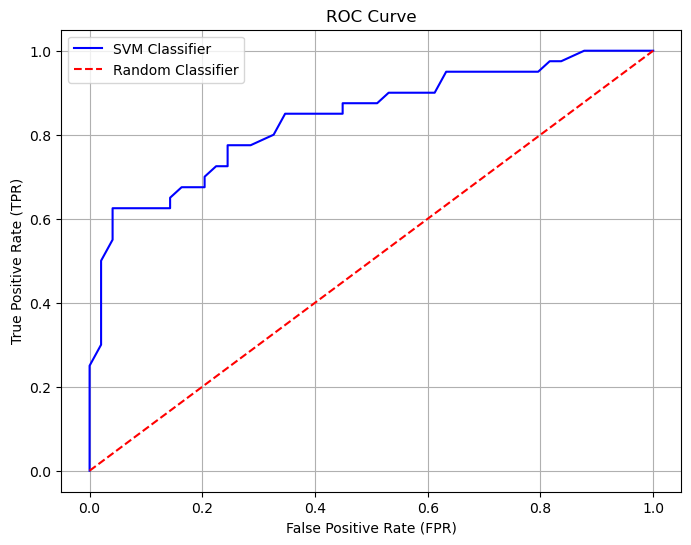

In [79]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, label='SVM Classifier', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


**Task 4.3 (6 Points):** Compute the AUC of ROC

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

Compute the AUC of your SVM model. **Note that you are not allowed to use any library function to compute the AUC. You have to do it from scratch.**

In [25]:
## Your code to compute the AUC goes here
# Sort FPR and corresponding TPR values
sorted_indices = np.argsort(fpr_values)
sorted_fpr = np.array(fpr_values)[sorted_indices]
sorted_tpr = np.array(tpr_values)[sorted_indices]

# Compute the AUC using the trapezoidal rule with sorted values
auc = 0
for i in range(1, len(sorted_fpr)):
    auc += (sorted_tpr[i] + sorted_tpr[i-1]) * (sorted_fpr[i] - sorted_fpr[i-1]) / 2

auc



0.8385204081632653